In [1]:
!pip install nltk pandas


In [2]:
import nltk
nltk.download('vader_lexicon')
nltk.download('twitter_samples')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:
from nltk.corpus import twitter_samples

# Load positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
all_tweets = positive_tweets + negative_tweets

print("Positive tweets:", len(positive_tweets))
print("Negative tweets:", len(negative_tweets))
print("Sample tweet:", all_tweets[0])


Positive tweets: 5000
Negative tweets: 5000
Sample tweet: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


In [5]:
results = []

for tweet in all_tweets:
    score = sia.polarity_scores(tweet)
    if score['compound'] > 0.05:
        sentiment = 'positive'
    elif score['compound'] < -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    results.append({'tweet': tweet, 'sentiment': sentiment})

# Check the first few results
import pandas as pd
df = pd.DataFrame(results)
df.head()


,tweet,sentiment
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,positive
2,@DespiteOfficial we had a listen last night :)...,positive
3,@97sides CONGRATS :),positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,positive


In [6]:
print(df['sentiment'].value_counts())


sentiment
positive    5536
negative    3673
neutral      791
Name: count, dtype: int64


In [7]:
!pip install matplotlib seaborn


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipython-input-3619110110.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['yellow', 'red', 'gray'])


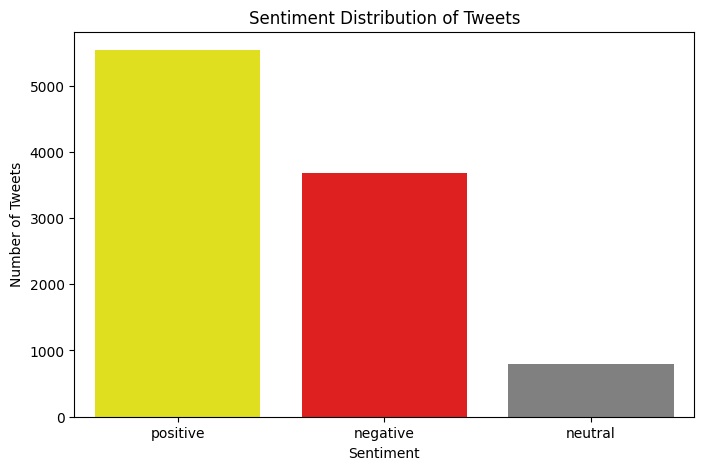

In [12]:
# Count the number of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['yellow', 'red', 'gray'])
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


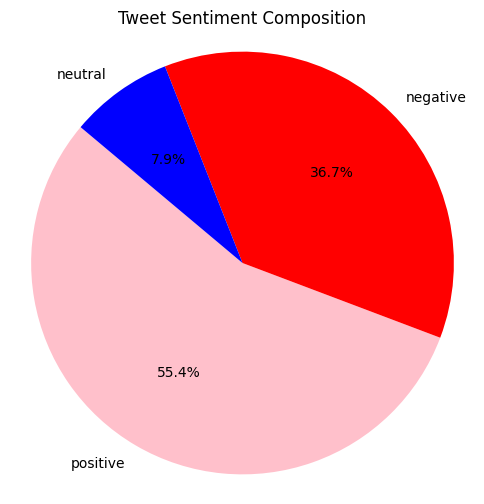

In [11]:
plt.figure(figsize=(6,6))
colors = ['pink', 'red', 'blue']
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Tweet Sentiment Composition')
plt.axis('equal')
plt.show()
